## https://www.kaggle.com/datasets/samithsachidanandan/air-traffic-in-europe-from-2016-to-2024/data

## Importing relevant modules

In [419]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import os

## Importing data and concatenating  it

In [420]:
# Creating an empty list and appending every read csv file to it, so that we can use that list to concat it into one big dataframe
dfs = []
for i in range(16, 25):
    dfs.append(pd.read_csv(f"airport_traffic_20{i}.csv"))

df = pd.concat(dfs)
df

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2
0,2016,1,JAN,01-01-16,LATI,Tirana,Albania,24,27,51,NaN,NaN,NaN
1,2016,1,JAN,01-01-16,UDYZ,Yerevan,Armenia,8,15,23,NaN,NaN,NaN
2,2016,1,JAN,01-01-16,LOWG,Graz,Austria,6,7,13,NaN,NaN,NaN
3,2016,1,JAN,01-01-16,LOWI,Innsbruck,Austria,26,32,58,NaN,NaN,NaN
4,2016,1,JAN,01-01-16,LOWK,Klagenfurt,Austria,3,4,7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114749,2024,12,DEC,31-12-24,EGNX,East Midlands,United Kingdom,51,61,112,NaN,NaN,NaN
114750,2024,12,DEC,31-12-24,EGPD,Aberdeen,United Kingdom,38,37,75,NaN,NaN,NaN
114751,2024,12,DEC,31-12-24,EGPF,Glasgow,United Kingdom,65,67,132,NaN,NaN,NaN
114752,2024,12,DEC,31-12-24,EGPH,Edinburgh,United Kingdom,135,140,275,135.0,141.0,276.0


## Simple check to see if we concatenated every year

In [421]:
df['YEAR'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

## Checking general info about the data

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983842 entries, 0 to 114753
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   YEAR           983842 non-null  int64  
 1   MONTH_NUM      983842 non-null  int64  
 2   MONTH_MON      983842 non-null  object 
 3   FLT_DATE       983842 non-null  object 
 4   APT_ICAO       983842 non-null  object 
 5   APT_NAME       983842 non-null  object 
 6   STATE_NAME     983842 non-null  object 
 7   FLT_DEP_1      983842 non-null  int64  
 8   FLT_ARR_1      983842 non-null  int64  
 9   FLT_TOT_1      983842 non-null  int64  
 10  FLT_DEP_IFR_2  292851 non-null  float64
 11  FLT_ARR_IFR_2  292851 non-null  float64
 12  FLT_TOT_IFR_2  292851 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 105.1+ MB


In [423]:
df.isnull().sum()

YEAR                  0
MONTH_NUM             0
MONTH_MON             0
FLT_DATE              0
APT_ICAO              0
APT_NAME              0
STATE_NAME            0
FLT_DEP_1             0
FLT_ARR_1             0
FLT_TOT_1             0
FLT_DEP_IFR_2    690991
FLT_ARR_IFR_2    690991
FLT_TOT_IFR_2    690991
dtype: int64

Because of a lot of missing data from the IFR flights, I will be dropping those columns altogether, and not considering IFR flights into my analysis. 

In [424]:
df_copy = df.copy()
df_modified = df_copy.drop(columns = df_copy.columns[10:])
df_modified


,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1
0,2016,1,JAN,01-01-16,LATI,Tirana,Albania,24,27,51
1,2016,1,JAN,01-01-16,UDYZ,Yerevan,Armenia,8,15,23
2,2016,1,JAN,01-01-16,LOWG,Graz,Austria,6,7,13
3,2016,1,JAN,01-01-16,LOWI,Innsbruck,Austria,26,32,58
4,2016,1,JAN,01-01-16,LOWK,Klagenfurt,Austria,3,4,7
...,...,...,...,...,...,...,...,...,...,...
114749,2024,12,DEC,31-12-24,EGNX,East Midlands,United Kingdom,51,61,112
114750,2024,12,DEC,31-12-24,EGPD,Aberdeen,United Kingdom,38,37,75
114751,2024,12,DEC,31-12-24,EGPF,Glasgow,United Kingdom,65,67,132
114752,2024,12,DEC,31-12-24,EGPH,Edinburgh,United Kingdom,135,140,275


# Looking at overall traffic by months throughout the years to see if there are any seasonal trends

In [425]:
#Grouping by year and month
traffic_by_year_europe= df_modified.groupby(by=['YEAR', 'MONTH_NUM', 'MONTH_MON'], as_index=False).agg({'FLT_TOT_1':'sum'})
traffic_by_year_europe.head(20)

,YEAR,MONTH_NUM,MONTH_MON,FLT_TOT_1
0,2016,1,JAN,1042854
1,2016,2,FEB,1045392
2,2016,3,MAR,1167319
3,2016,4,APR,1240486
4,2016,5,MAY,1368312
5,2016,6,JUN,1404071
6,2016,7,JUL,1479337
7,2016,8,AUG,1468078
8,2016,9,SEP,1434728
9,2016,10,OCT,1361767


In [426]:
#Creating a new DATE column, so that we can have a nice ordered x-axis
traffic_by_year_europe['DATE'] = pd.to_datetime(traffic_by_year_europe['YEAR'].astype(str) + '-' + traffic_by_year_europe['MONTH_NUM'].astype(str))
traffic_by_year_europe

,YEAR,MONTH_NUM,MONTH_MON,FLT_TOT_1,DATE
0,2016,1,JAN,1042854,2016-01-01
1,2016,2,FEB,1045392,2016-02-01
2,2016,3,MAR,1167319,2016-03-01
3,2016,4,APR,1240486,2016-04-01
4,2016,5,MAY,1368312,2016-05-01
...,...,...,...,...,...
103,2024,8,AUG,1623722,2024-08-01
104,2024,9,SEP,1564478,2024-09-01
105,2024,10,OCT,1506715,2024-10-01
106,2024,11,NOV,1200333,2024-11-01


### Plotting the data

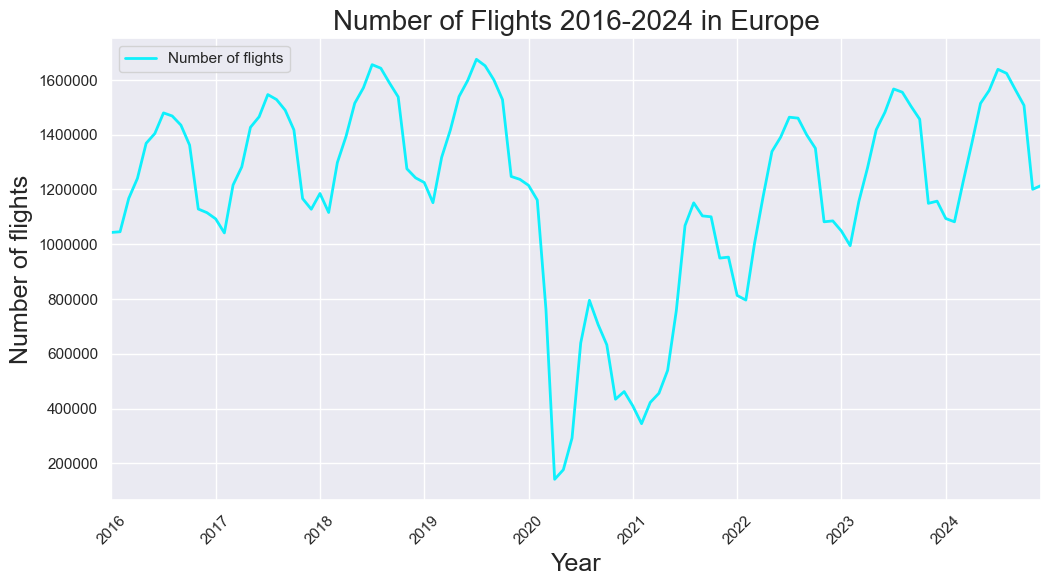

In [427]:
traffic_by_year_europe.plot(x='DATE', y='FLT_TOT_1',lw=2, c='#0FF0FC', figsize=(12,6))
plt.title('Number of Flights 2016-2024 in Europe', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of flights', fontsize=18)
plt.legend(['Number of flights'])
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45)
plt.show()


We can clearly see a sudden drop in total flights in Europe at the start of 2020, which is a result of the pandemic. We can also see that there are periodical spikes in air traffic in the middle of the year(summer time). Also, the total amount of air traffic since pandemic, hasn't went back to pre-pandemic levels. 

## Let's see which countries in Europe are the busiest in terms of air traffic

In [428]:
top_countries = df_modified.groupby(by=['STATE_NAME'], as_index=False).agg({'FLT_TOT_1':'sum'}).sort_values(by=['FLT_TOT_1'], ascending=False).reset_index(drop=True)
top_countries.head(10)

,STATE_NAME,FLT_TOT_1
0,Spain,16516439
1,United Kingdom,15557754
2,Germany,14910621
3,France,14377811
4,Italy,9567630
5,Turkey,8577810
6,Norway,5372542
7,Netherlands,4282241
8,Greece,4167203
9,Portugal,3487895


Above we can see the top 10 countries that have had the most air traffic between 2016 and 2024. Most of these countries are economically developed, and/or have famous tourist attractions.

In [429]:
top_countries_arr = df_modified.groupby(by=['STATE_NAME'], as_index=False).agg({'FLT_ARR_1':'sum'}).sort_values(by=['FLT_ARR_1'], ascending=False).reset_index(drop=True)
top_countries_arr.head(10)

,STATE_NAME,FLT_ARR_1
0,Spain,8258049
1,United Kingdom,7780021
2,Germany,7465452
3,France,7194016
4,Italy,4784956
5,Turkey,4289043
6,Norway,2687035
7,Netherlands,2141415
8,Greece,2084475
9,Portugal,1743548


We can see that top countries in Europe in terms of overall flights during this period, and in terms of arrival flights are exactly the same. Next let's see how the top 5 countries compare to the whole continent.

In [430]:
top_five_countries_sum = top_countries['FLT_TOT_1'].head(5).sum()
europe_sum = df_modified['FLT_TOT_1'].sum()

percent_of_total = top_five_countries_sum/europe_sum * 100
print(f"Top five countries account for {round(percent_of_total,2)}% of total air traffic of Europe in the period 2016-2024")

Top five countries account for 55.14% of total air traffic of Europe in the period 2016-2024


### Let's also see what are the top tourist season (summer time) destinations during this period between 2016 and 2024. We will only look at arrival flights.

In [431]:
#First let's check if we are right that the tourist season is the summer time period. Even tho we could see a massive spike in number of flights
#during the middle of the year, let's double check

#First we sort by the total flight numbers in descending order
check = df_modified.groupby(['YEAR','MONTH_MON'], as_index=False).agg({"FLT_TOT_1":'sum'}).sort_values([ 'YEAR','FLT_TOT_1'], ascending=[True, False])
#And then we get the top 4 months for each year to see if they are the same in each year
top_4_months_per_year = check.groupby('YEAR').apply(lambda x: x.sort_values('FLT_TOT_1', ascending=False).head(4)).reset_index(drop=True)
top_4_months_per_year

,YEAR,MONTH_MON,FLT_TOT_1
0,2016,JUL,1479337
1,2016,AUG,1468078
2,2016,SEP,1434728
3,2016,JUN,1404071
4,2017,JUL,1546209
5,2017,AUG,1528154
6,2017,SEP,1489245
7,2017,JUN,1465258
8,2018,JUL,1655518
9,2018,AUG,1642498


As we can see, in every year July has the most flights, than it's August, September and lastly June. So we will use only those months as our tourist season timeframe.

In [432]:
# Now we can with confidence separate the data that contains these months.
tourist_season = df_modified[df_modified['MONTH_MON'].str.contains('JUN|JUL|AUG|SEP')]
tourist_season_destinations = tourist_season.groupby(by='STATE_NAME', as_index=False).agg({"FLT_ARR_1":'sum'}).sort_values('FLT_ARR_1', ascending=False).reset_index(drop=True)
tourist_season_destinations.head(10)


,STATE_NAME,FLT_ARR_1
0,Spain,3269017
1,United Kingdom,2900604
2,Germany,2756481
3,France,2745915
4,Italy,1867859
5,Turkey,1695357
6,Greece,1138289
7,Norway,939862
8,Netherlands,783351
9,Portugal,690566


We can see that the top destination for the summer time during 2016-2024 was Spain. The order of the top summer destinations and throughout the whole year (during 2016-2024) is different, with Greece moving up, and Norway, and the Netherlands moving down the list.

## Next we will se how the total air traffic of Serbia compares to the total air traffic in Europe, during this period.

In [433]:
#Separating data that's related to Serbia into a specific DataFrame
df_serbia_airtraffic = df_modified[df_modified['STATE_NAME'].str.contains('Serbia')]
df_serbia_airtraffic

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1
169,2016,1,JAN,01-01-16,LYBE,Belgrade - Nikola Tesla,Serbia,53,46,99
413,2016,1,JAN,02-01-16,LYBE,Belgrade - Nikola Tesla,Serbia,73,75,148
667,2016,1,JAN,03-01-16,LYBE,Belgrade - Nikola Tesla,Serbia,70,75,145
925,2016,1,JAN,04-01-16,LYBE,Belgrade - Nikola Tesla,Serbia,79,81,160
1177,2016,1,JAN,05-01-16,LYBE,Belgrade - Nikola Tesla,Serbia,77,75,152
...,...,...,...,...,...,...,...,...,...,...
113482,2024,12,DEC,27-12-24,LYBE,Belgrade - Nikola Tesla,Serbia,117,119,236
113777,2024,12,DEC,28-12-24,LYBE,Belgrade - Nikola Tesla,Serbia,103,101,204
114077,2024,12,DEC,29-12-24,LYBE,Belgrade - Nikola Tesla,Serbia,112,107,219
114380,2024,12,DEC,30-12-24,LYBE,Belgrade - Nikola Tesla,Serbia,119,117,236


In [434]:
#Grouping the data by year and month
traffic_by_year_serbia = df_serbia_airtraffic.groupby(by=['YEAR', 'MONTH_NUM', 'MONTH_MON'], as_index=False).agg({'FLT_TOT_1':'sum'})
traffic_by_year_serbia['DATE'] = pd.to_datetime(traffic_by_year_serbia['YEAR'].astype(str) + '-' + traffic_by_year_serbia['MONTH_NUM'].astype(str))
traffic_by_year_serbia

,YEAR,MONTH_NUM,MONTH_MON,FLT_TOT_1,DATE
0,2016,1,JAN,4420,2016-01-01
1,2016,2,FEB,4050,2016-02-01
2,2016,3,MAR,4602,2016-03-01
3,2016,4,APR,5005,2016-04-01
4,2016,5,MAY,5423,2016-05-01
...,...,...,...,...,...
103,2024,8,AUG,8826,2024-08-01
104,2024,9,SEP,8389,2024-09-01
105,2024,10,OCT,7570,2024-10-01
106,2024,11,NOV,6554,2024-11-01


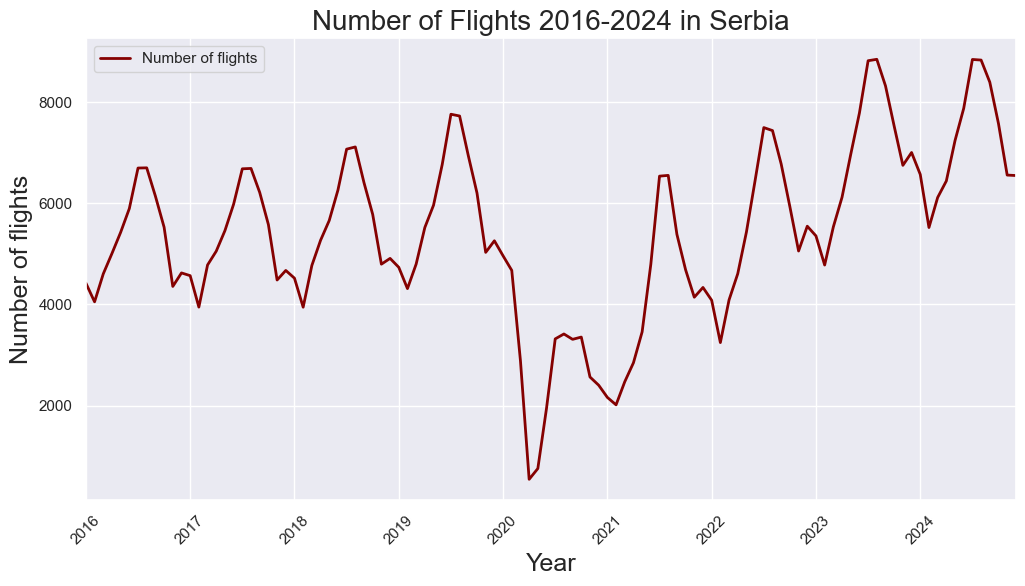

In [435]:
#Plotting the data
traffic_by_year_serbia.plot(x='DATE', y='FLT_TOT_1', lw=2, c='#850101', figsize=(12,6))
plt.title('Number of Flights 2016-2024 in Serbia', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of flights', fontsize=18)
plt.legend(['Number of flights'])
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45)
plt.show()

To compare the graphs more easily we will put them side by side

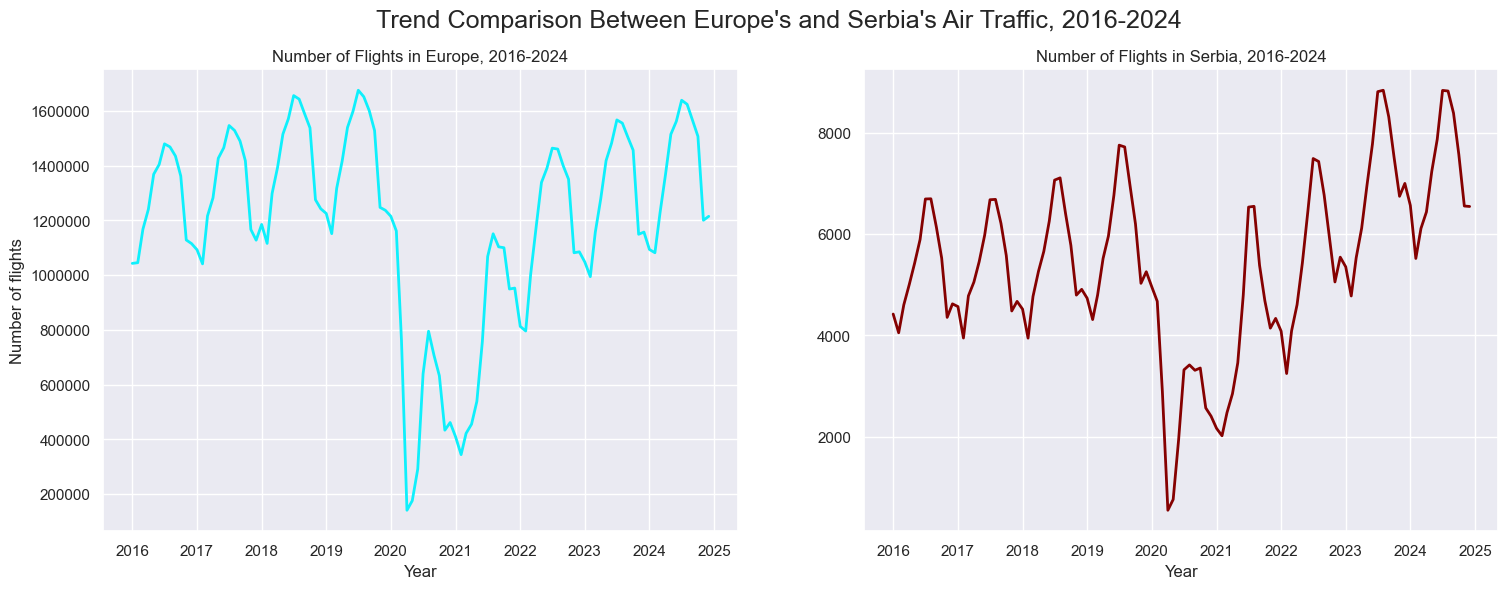

In [436]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
fig.suptitle('Trend Comparison Between Europe\'s and Serbia\'s Air Traffic, 2016-2024', fontsize=18)

traffic_data = {
    0: traffic_by_year_europe,
    1: traffic_by_year_serbia
}
places = ['Europe', 'Serbia']
colors = {
    0: '#0FF0FC',
    1: '#850101'
}
for i in range(2):
    axes[i].plot(traffic_data[i]['DATE'], traffic_data[i]['FLT_TOT_1'],lw=2, c=colors[i])
    axes[i].set_title(f"Number of Flights in {places[i]}, 2016-2024")
    axes[i].ticklabel_format(axis='y', style='plain')
    axes[i].set_xlabel("Year")
    if i == 0:
        axes[i].set_ylabel("Number of flights")




The trend between the two are similar, the difference being the total amount of flights, which is logical considering that we are comparing a continent's to a country's air traffic. One more difference that we can see is that in the period of 2023-2024, Serbia's air traffic passed the pre-pandemic levels, while Europe's is still bellow what it was before the pandemic.

### Let us also see the difference in total amount of flights between the two side-by-side

In [437]:
### first we will get the sum of all flights in one year for both europe and serbia (because we currently have the sum of flights 
# for every month in every year)
total_flights_europe = df_modified.groupby('YEAR', as_index=False).agg({'FLT_TOT_1': 'sum'})
total_flights_serbia = df_serbia_airtraffic.groupby('YEAR', as_index=False).agg({'FLT_TOT_1': 'sum'})



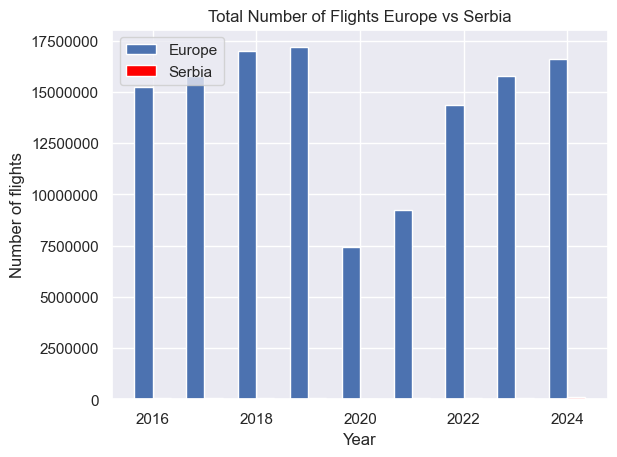

In [438]:
### Next we will plot the data using bar charts
bar_width = 0.35
plt.bar(x=total_flights_europe['YEAR'] - bar_width/2, height=total_flights_europe['FLT_TOT_1'], width=bar_width, label='Europe')
plt.bar(x=total_flights_europe['YEAR'] + bar_width/2, height=total_flights_serbia['FLT_TOT_1'], width=bar_width, label='Serbia', color='red')
plt.title("Total Number of Flights Europe vs Serbia")
plt.xlabel("Year")
plt.ylabel("Number of flights")
plt.ticklabel_format(axis='y', style='plain')
plt.legend(['Europe', 'Serbia'])
plt.show()

Because there is a drastic difference in the number of flights between Europe and Serbia, on the graph above it looks like Serbia's
data isn't even plotted. To fix this we will log-scale it so that we can see the difference.

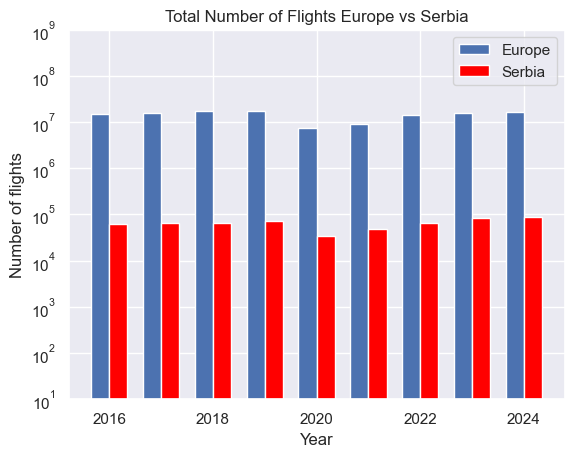

In [439]:
bar_width = 0.35
plt.bar(x=total_flights_europe['YEAR'] - bar_width/2, height=total_flights_europe['FLT_TOT_1'], width=bar_width, label='Europe')
plt.bar(x=total_flights_europe['YEAR'] + bar_width/2, height=total_flights_serbia['FLT_TOT_1'], width=bar_width, label='Serbia', color='red')
plt.title("Total Number of Flights Europe vs Serbia")
plt.xlabel("Year")
plt.ylabel("Number of flights")
plt.legend(['Europe', 'Serbia'])
plt.yscale('log')
plt.ylim([10e0, 10e8])
plt.show()

We can see in the above graph that Europe's number of flights per year goes above a billion, and that Serbia's doesn't even go above 100k. Meaning that Europe has up to a 1000 times more flights per year than Serbia, or in other words that Serbia accounts for around 0.1% of all the flights in Europe per year.

## Next let's see if there is more arrivals or departures in Serbia

In [440]:
serbia_dep_arr = df_serbia_airtraffic.groupby(by=['YEAR'], as_index=False).agg({'FLT_DEP_1': 'sum', 'FLT_ARR_1': 'sum'})
serbia_dep_arr

,YEAR,FLT_DEP_1,FLT_ARR_1
0,2016,31715,31705
1,2017,32042,32038
2,2018,33219,33247
3,2019,35490,35488
4,2020,17056,17073
5,2021,24696,24671
6,2022,33073,33048
7,2023,41901,41855
8,2024,43249,43215


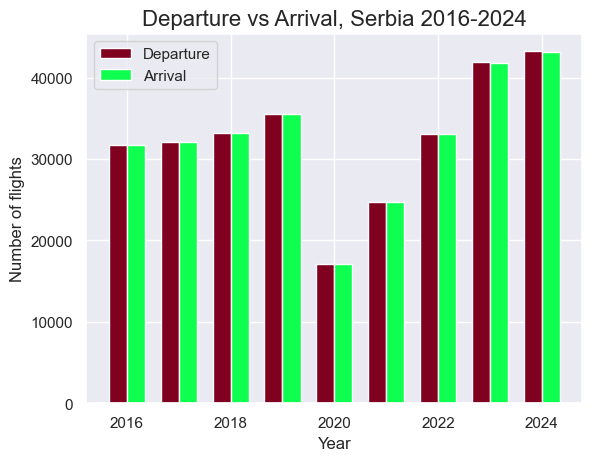

In [441]:
bar_width = 0.35
plt.bar(x=serbia_dep_arr['YEAR'] - bar_width/2, height=serbia_dep_arr['FLT_DEP_1'], width=bar_width, label='Departure', color='#800020')
plt.bar(x=serbia_dep_arr['YEAR'] + bar_width/2, height=serbia_dep_arr['FLT_ARR_1'], width=bar_width, label='Arrival', color='#0FFF50')
plt.title('Departure vs Arrival, Serbia 2016-2024', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of flights')
plt.legend(['Departure', 'Arrival'])
plt.show()

Departure and arrival flights in Serbia seem to be identical, and there doesn't seem to be any drastic difference in the number of flights that are coming into and going out of Serbia.